# Part 1 & 2

## Imports

In [2]:

import numpy as np
import pandas as pd
from textblob import TextBlob
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk import pos_tag
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('wordnet')
from nltk.corpus import wordnet
import re
nltk.download('averaged_perceptron_tagger')
from nltk.stem import WordNetLemmatizer 


[nltk_data] Downloading package punkt to C:\Users\Rohit
[nltk_data]     Padage\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Rohit
[nltk_data]     Padage\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Rohit
[nltk_data]     Padage\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Rohit Padage\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


## Handling the Dataset

In this part I have cleaned the dataset by removing unwanted columns, removing punctuation marks in the tweetcaption column and using only relevant words for sentiment analysis.

In [41]:
data = pd.read_csv('F:/MyGithub/public-sentiment-analysis-based-on-twitter-hashtags/datasets/datasets/dataset.csv')
data.head()

,Data,Date,Time,tweetcaption
0,tuesdayvibes,7/14/2020,7:00:21,Love it here vacation vibes amazing beautiful ...
1,realmeC11,7/14/2020,7:00:21,Best Camera Smartphone under 20k Please vote a...
2,KPSharmaOli,7/14/2020,7:00:21,shree Why should we have a problem with the pe...
3,RheaChakraborty,7/14/2020,7:00:21,Rhea Chakraborty s Heartbreaking Post On Susha...
4,Stop_Transfer_Sunita_Yadav,7/14/2020,7:00:21,We stand for Sunita Yadav Stop the Transfer Wh...


In [42]:
def clean(txt):
# Removing all special characters and numericals leaving the alphabets
    txt = re.sub('[^A-Za-z]+', ' ', txt)
    return txt

# Cleaning the text in the tweetcaption column
data['cleaned_tweetcaption'] = data['tweetcaption'].apply(clean)
data.head()

,Data,Date,Time,tweetcaption,cleaned_tweetcaption
0,tuesdayvibes,7/14/2020,7:00:21,Love it here vacation vibes amazing beautiful ...,Love it here vacation vibes amazing beautiful ...
1,realmeC11,7/14/2020,7:00:21,Best Camera Smartphone under 20k Please vote a...,Best Camera Smartphone under k Please vote and...
2,KPSharmaOli,7/14/2020,7:00:21,shree Why should we have a problem with the pe...,shree Why should we have a problem with the pe...
3,RheaChakraborty,7/14/2020,7:00:21,Rhea Chakraborty s Heartbreaking Post On Susha...,Rhea Chakraborty s Heartbreaking Post On Susha...
4,Stop_Transfer_Sunita_Yadav,7/14/2020,7:00:21,We stand for Sunita Yadav Stop the Transfer Wh...,We stand for Sunita Yadav Stop the Transfer Wh...


In [43]:
# POS tagger dictionary
#classifying the parts of senyences as noun, verb, adverb or adjective
pos_dict = {'J':wordnet.ADJ, 'V':wordnet.VERB, 'N':wordnet.NOUN, 'R':wordnet.ADV}
def token_stop_pos(text):
    tags = pos_tag(word_tokenize(text))
    newlist = []
    for word, tag in tags:
        if word.lower() not in set(stopwords.words('english')):
            newlist.append(tuple([word, pos_dict.get(tag[0])]))
    return newlist

data['POS_tagged'] = data['cleaned_tweetcaption'][0:1000].apply(token_stop_pos)
data.head() 

,Data,Date,Time,tweetcaption,cleaned_tweetcaption,POS_tagged
0,tuesdayvibes,7/14/2020,7:00:21,Love it here vacation vibes amazing beautiful ...,Love it here vacation vibes amazing beautiful ...,"[(Love, v), (vacation, n), (vibes, n), (amazin..."
1,realmeC11,7/14/2020,7:00:21,Best Camera Smartphone under 20k Please vote a...,Best Camera Smartphone under k Please vote and...,"[(Best, n), (Camera, n), (Smartphone, n), (k, ..."
2,KPSharmaOli,7/14/2020,7:00:21,shree Why should we have a problem with the pe...,shree Why should we have a problem with the pe...,"[(shree, a), (problem, n), (people, n), (probl..."
3,RheaChakraborty,7/14/2020,7:00:21,Rhea Chakraborty s Heartbreaking Post On Susha...,Rhea Chakraborty s Heartbreaking Post On Susha...,"[(Rhea, n), (Chakraborty, n), (Heartbreaking, ..."
4,Stop_Transfer_Sunita_Yadav,7/14/2020,7:00:21,We stand for Sunita Yadav Stop the Transfer Wh...,We stand for Sunita Yadav Stop the Transfer Wh...,"[(stand, v), (Sunita, n), (Yadav, n), (Stop, n..."


In [44]:
#using the pos_tagged column data to create a lemma column conatining relevant words
my_data=data
wordnet_lemmatizer = WordNetLemmatizer()
def lemmatize(pos_data):
    lemma_rew = " "
    for word, pos in pos_data:
        if not pos:
            lemma = word
            lemma_rew = lemma_rew + " " + lemma
        else:
            lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
            lemma_rew = lemma_rew + " " + lemma
    return lemma_rew

my_data['Lemma'] = my_data['POS_tagged'][0:1000].apply(lemmatize)
my_data[90:100].head()

,Data,Date,Time,tweetcaption,cleaned_tweetcaption,POS_tagged,Lemma
90,EkTarfaOutTomorrow,7/14/2020,9:59:15,"Anybody awake EkTarfaOutTomorrow,Mutual feelin...",Anybody awake EkTarfaOutTomorrow Mutual feelin...,"[(Anybody, n), (awake, v), (EkTarfaOutTomorrow...",Anybody awake EkTarfaOutTomorrow Mutual feel...
91,NepaliRam,7/14/2020,9:59:15,The biggest casualty of a NepaliRam would be o...,The biggest casualty of a NepaliRam would be o...,"[(biggest, a), (casualty, n), (NepaliRam, n), ...",big casualty NepaliRam would TV channel imag...
92,armyisoverparty,7/14/2020,9:59:15,nchild Chill Antis try to make armyisoverparty...,nchild Chill Antis try to make armyisoverparty...,"[(nchild, a), (Chill, n), (Antis, n), (try, n)...",nchild Chill Antis try make armyisoverparty ...
93,WorldCup2019,7/14/2020,9:59:15,Brilliant memories WorldCup2019 WorldCupFinal ...,Brilliant memories WorldCup WorldCupFinal ENGv...,"[(Brilliant, a), (memories, n), (WorldCup, n),...",Brilliant memory WorldCup WorldCupFinal ENGv...
94,Tucson,7/14/2020,9:59:15,Been out and about since 10 am watching the cl...,Been out and about since am watching the cloud...,"[(since, None), (watching, v), (clouds, n), (H...",since watch cloud Huge break scatter Come mo...


## Building Functions

### Using Rule Based Method- TextBlob

TextBlob calculates the polarity and subjectivity of a tweet and based on the polarity we judge whether a tweet is in positive, negative or neutral context.
Subjective sentences generally refer to personal opinion, emotion or judgment whereas objective refers to factual information.
So low subjectivity refers to a facual information whereas a high value refers to a public opinion.

In [49]:
# function to calculate subjectivity
def getSubjectivity(review):
    return TextBlob(review).sentiment.subjectivity
# function to calculate polarity
def getPolarity(review):
    return TextBlob(review).sentiment.polarity

# function to analyze the reviews
def analysis(score):
    if score < 0:
        return 'Negative'
    elif score==0:
        return 'Neutral'
    else:
        return 'Positive'    

In [50]:
blob_data = pd.DataFrame(my_data[['tweetcaption', 'Lemma']])
#print(blob_data)
blob_data=blob_data[0:1000]

In [51]:
blob_data['Subjectivity'] = blob_data['Lemma'].apply(getSubjectivity) 
blob_data['Polarity'] = blob_data['Lemma'].apply(getPolarity) 
blob_data['Analysis'] = blob_data['Polarity'].apply(analysis)
blob_data.head()

,tweetcaption,Lemma,Subjectivity,Polarity,Analysis
0,Love it here vacation vibes amazing beautiful ...,Love vacation vibe amaze beautiful cabo mexi...,0.478571,0.142695,Positive
1,Best Camera Smartphone under 20k Please vote a...,Best Camera Smartphone k Please vote help re...,0.445174,0.200033,Positive
2,shree Why should we have a problem with the pe...,shree problem people problem Stupid Communis...,0.638750,0.118750,Positive
3,Rhea Chakraborty s Heartbreaking Post On Susha...,Rhea Chakraborty Heartbreaking Post Sushant ...,0.607143,0.142857,Positive
4,We stand for Sunita Yadav Stop the Transfer Wh...,stand Sunita Yadav Stop Transfer woman empow...,0.515079,0.213228,Positive


In [52]:
tb_counts = blob_data.Analysis.value_counts()

tb_counts

Positive    849
Negative    144
Neutral       7
Name: Analysis, dtype: int64

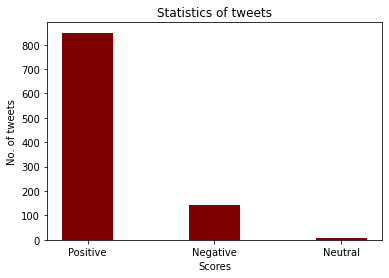

In [53]:
#Bar Chart 
import matplotlib.pyplot as plt

data = {'Positive':tb_counts[0], 'Negative': tb_counts[1],'Neutral':tb_counts[2] }
k=list(data.keys())
v=list(data.values())

plt.bar(k,v , color ='maroon',
        width = 0.4)
 
plt.xlabel("Scores")
plt.ylabel("No. of tweets")
plt.title("Statistics of tweets")
plt.show()

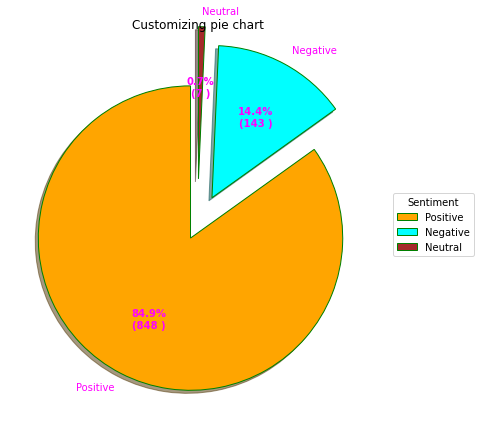

In [76]:
# Pie Chart

import matplotlib.pyplot as plt

data = {'Positive':tb_counts[0], 'Negative': tb_counts[1],'Neutral':tb_counts[2] }
k=list(data.keys())
v=list(data.values())
explode = (0.1,0.2, 0.3)

# Creating color parameters
colors = ( "orange", "cyan", "brown",
		"grey", "indigo", "beige")

# Wedge properties
wp = { 'linewidth' : 1, 'edgecolor' : "green" }

# Creating autocpt arguments
def func(pct, allvalues):
	absolute = int(pct / 100.*np.sum(allvalues))
	return "{:.1f}%\n({:d} )".format(pct, absolute)

# Creating plot
fig, ax = plt.subplots(figsize =(10, 7))
wedges, texts, autotexts = ax.pie(v,
								autopct = lambda pct: func(pct,v),
								explode = explode,
								labels = k,
								shadow = True,
								colors = colors,
								startangle = 90,
								wedgeprops = wp,
								textprops = dict(color ="magenta"))

# Adding legend
ax.legend(wedges,k,
		title ="Sentiment",
		loc ="center left",
		bbox_to_anchor =(1, 0, 0.5, 1))
	#	bbox_to_anchor =(2, 1, 1.5, 2))

plt.setp(autotexts, size = 10, weight ="bold")
ax.set_title("Customizing pie chart")

# show plot
plt.show()


We can see that we have a higher number of positive tweets in the dataset.